# Hockey Project

##### Is it true that "cheaters never win"?

In a sport which produces outcomes more dependent on "luck," or at least random outcomes [CITE], is it any wonder that games often come down to the built-in advantage produced by the power play? Football relies on violence as an inherent aspect of the sport. Baseball, for instance, does not require the first baseman to deck the runner to get him out (though there are plenty of perceived dirty tactics, such as the takeout slide and throwing at a runner, though we'll ignore those for now). Though basketball requires plenty of physicality, from scrapping for rebounds and on defense to setting hard screens, and has had its share of brawls (see Palace, Malice at the or Jeff van Gundy famously clinging to Alonzo Mourning's leg), hockey is perhaps unique among the pantheon of American sports for its usage of controlled violence. A hard yet clean hit can change the momentum of a game, while an ill-advised penalty can do the same in the opposite direction. Hockey is also the only sport where, if the referees so allow it, players can openly fight, though this is due to the fact that they cannot fully gather their weight behind a punch on their unique playing surface. Hockey also has produced its fair share of "enforcers," players whose job is mostly if not wholly to bring their team a physical edge. Though this has resulted in plenty of dirty hits and players (*cough* Tom Wilson *cough*, *cough* Brad "Shootout King" Marchand *cough*), it also produces (synonym) an entirely different side to the game. 

This physical side of hockey can both result in penalties or in drawing penalties, which leads to power plays (or, as Sebastien Aho lovingly calls them, PPs). (Statistics on Power-Play advantages)

At home games, immediately before the beginning of a visitor's power play, the Carolina Hurricanes play the iconic *dun dun* of *Law and Order* fame, prompting the fans to gleefully scream: "Cheaters never win!" The team is rather ambiguous on what that word precisely means, however. According to *Webster's Dictionary*, ... (just kidding, y'all). I recently wondered exactly what they meant. What, exactly, is a cheater in this context? And, if we can find a satisfying explanation, is it indeed true that they never win?

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use('fivethirtyeight')

In [6]:
canes_df = pd.read_csv('canes.csv')

canes_df.shape

(1876, 29)

In [7]:
canes_df.head()

,year,date_game,game_location,opp_name,goals,opp_goals,game_outcome,overtimes,shots,pen_min,goals_pp,chances_pp,goals_sh,shots_against,pen_min_opp,goals_against_pp,opp_chances_pp,goals_against_sh,corsi_for,corsi_against,corsi_pct,fenwick_for,fenwick_against,fenwick_pct,faceoff_wins,faceoff_losses,faceoff_percentage,zs_offense_pct,pdo
0,1998,1997-10-01,A,Tampa Bay Lightning,2.0,4.0,L,NaN,29.0,39.0,1.0,NaN,0.0,27.0,39.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,1997-10-03,H,Pittsburgh Penguins,3.0,4.0,L,NaN,28.0,72.0,2.0,NaN,0.0,27.0,43.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,1997-10-04,A,Ottawa Senators,2.0,3.0,L,NaN,18.0,16.0,1.0,NaN,0.0,27.0,10.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,1997-10-07,H,Los Angeles Kings,3.0,3.0,T,OT,29.0,18.0,0.0,NaN,0.0,30.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1997-10-10,H,New Jersey Devils,2.0,1.0,W,NaN,27.0,8.0,0.0,NaN,0.0,17.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first thing I had to do was get game data for Hurricanes games since their inaugural season in North Carolina in 1997 (sorry, Whalers fans - I love your logo and jerseys <3). Though it's unclear to me when the Canes started using this power play intro (what am I gonna do, reach out to the team for a personal project?), preliminary research reveals that the chant has been around since the early days of the Raleigh Entertainment and Sports Arena (what a throwback). Apparently, the chant was brought from Johns Hopkins lacrosse games by one of the founders of what would become Section 328 (LINK), a supporter group of the Hurricanes which has also used the line as the name of their podcast since 2013. I got the game logs for every regular season game played by the Carolina Hurricanes before separating out home games (we'll explore more broadly later) from Hockey Reference. In the process I discovered I had forgotten about the lockout season since there's no page for the 2005 game data. Though more recent seasons have more statistics tracked (thanks, sabermetrics!), I got a solid 940 games to work with, with complete statistics like shots, penalty minutes, and more [FOOTNOTE FOR COMPLETE LIST]. 

In [10]:
games_home = canes_df[canes_df['game_location'] == 'H']
games_home_no_ties = games_home[games_home['game_outcome'] != 'T']
games_home['game_outcome'] = games_home['game_outcome'].apply(lambda x : 1 if x == 'W' else 0)
games_home_no_ties['game_outcome'] = games_home_no_ties['game_outcome'].apply(lambda x : 1 if x == 'W' else 0)

games_home_no_ties.shape

(886, 29)

#### Should we filter out ties as I do before? I guess the alternative is to treat ties as non-Canes victories but that doesn't seem quite right either - in this case, by definition, no "cheater" or "non-cheater"

In [11]:
games_home_no_ties.head()

,year,date_game,game_location,opp_name,goals,opp_goals,game_outcome,overtimes,shots,pen_min,goals_pp,chances_pp,goals_sh,shots_against,pen_min_opp,goals_against_pp,opp_chances_pp,goals_against_sh,corsi_for,corsi_against,corsi_pct,fenwick_for,fenwick_against,fenwick_pct,faceoff_wins,faceoff_losses,faceoff_percentage,zs_offense_pct,pdo
1,1998,1997-10-03,H,Pittsburgh Penguins,3.0,4.0,0,NaN,28.0,72.0,2.0,NaN,0.0,27.0,43.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1997-10-10,H,New Jersey Devils,2.0,1.0,1,NaN,27.0,8.0,0.0,NaN,0.0,17.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1998,1997-10-22,H,St. Louis Blues,4.0,3.0,1,NaN,26.0,8.0,0.0,NaN,0.0,31.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2011,2010-10-08,H,Minnesota Wild,2.0,1.0,1,SO,37.0,19.0,0.0,NaN,0.0,42.0,19.0,1.0,NaN,0.0,48.0,56.0,46.2,35.0,46.0,43.2,16.0,36.0,30.8,52.6,103.3
23,2010,2009-10-02,H,Philadelphia Flyers,0.0,2.0,0,NaN,28.0,29.0,0.0,NaN,0.0,27.0,25.0,2.0,NaN,0.0,41.0,35.0,53.9,33.0,30.0,52.4,18.0,21.0,46.2,66.1,100.0


First, let's take a very simplistic approach. Can we predict whether the Canes win a home game based on how many penalty minutes their opponent has? It might seem right that the "cheaters never win" line, since it plays only for opponent power plays, correlates with the opponent's actions. Let's plot some data first to see if we're on the right track.

In [12]:
result = np.array(games_home_no_ties['game_outcome'])

In [13]:
opp_pim = np.array(games_home_no_ties['pen_min_opp'].fillna(0))

opp_pim_reshape = opp_pim.reshape((opp_pim.shape[0], 1))

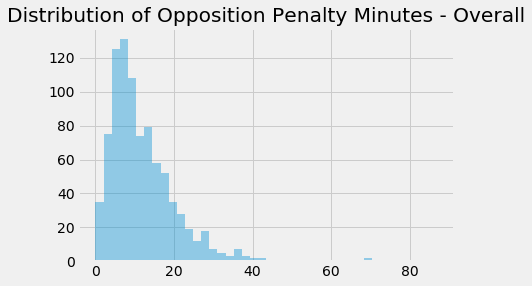

In [14]:
sns.distplot(opp_pim, kde=False).set_title('Distribution of Opposition Penalty Minutes - Overall')

plt.show()

In [15]:
opp_pim_wins = np.array(games_home_no_ties[games_home_no_ties['game_outcome'] == 1]['pen_min_opp'].fillna(0))
opp_pim_losses = np.array(games_home_no_ties[games_home_no_ties['game_outcome'] == 0]['pen_min_opp'].fillna(0))

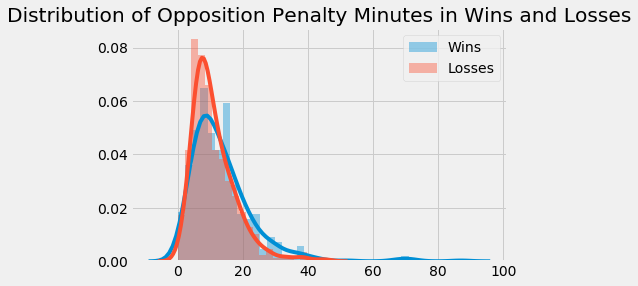

In [16]:
ax = sns.distplot(opp_pim_wins, label='Wins')
sns.distplot(opp_pim_losses, label='Losses', ax=ax)

ax.set_title('Distribution of Opposition Penalty Minutes in Wins and Losses')

plt.legend()
plt.show()

From the plots, it seems that it might be hard to separate and predict wins and losses purely from opposition penalty minutes alone. Though there seem to be larger peaks for wins to the right of the peaks of the losses, the overall fit to the distributions is rather similar. Nevertheless, we persist! We shall produce a logistic regression model (fancy speak for trying to predict a 1/win or a 0/loss based on some data) for this purpose.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
range_c = 10

param_grid_reg = {
    'C' : [10**i for i in range(-range_c, range_c+1) if i != 0],
    'fit_intercept' : [True, False]
}
# param_grid = {
#     'logistic__C' : [10**i for i in range(-range_c, range_c+1) if i != 0],
#     'logistic__fit_intercept' : [True, False]
# }

# pipe_min_max = Pipeline([
#     ('scale', MinMaxScaler()),
#     ('logistic', LogisticRegression())
# ])

# pipe_standard = Pipeline([
#     ('scale', StandardScaler()),
#     ('logistic', LogisticRegression())
# ])

grid_search_reg = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_reg, cv=5)
# grid_search_min_max = GridSearchCV(pipe_min_max, param_grid=param_grid, cv=5)
# grid_search_standard = GridSearchCV(pipe_standard, param_grid=param_grid, cv=5)

grid_search_reg.fit(opp_pim_reshape, result)
# grid_search_min_max.fit(opp_pim_reshape, result)
# grid_search_standard.fit(opp_pim_reshape, result)

print (grid_search_reg.score(opp_pim_reshape, result))
# print (grid_search_min_max.score(opp_pim_reshape, result))
# print (grid_search_standard.score(opp_pim_reshape, result))

0.5485327313769752


In [19]:
best = grid_search_reg.best_estimator_
# min_max_best = grid_search_min_max.best_estimator_.named_steps['logistic']
# standard_best = grid_search_standard.best_estimator_.named_steps['logistic']

coefs = best.coef_
intercept = best.intercept_

# min_max_coefs = min_max_best.coef_
# min_max_intercept = min_max_best.intercept_

# standard_coefs = standard_best.coef_
# standard_intercept = standard_best.intercept_

print (coefs, intercept)
# print (min_max_coefs, min_max_intercept)
# print (standard_coefs, standard_intercept)

[[0.03527747]] [-0.30161866]


By using some math, we can see what barrier of penalty minutes it takes for the model to predict a Canes win:

$$ \frac{1}{1+e^{-(m \bullet x+b)}} \ge \frac{1}{2} $$

$$ 2 \ge 1 + e^{-(m \bullet x+b)} $$

$$ 1 \ge e^{-(m \bullet x+b)} $$

$$ 0 \ge -(m \bullet x+b) $$

$$ 0 < m \bullet x + b $$

$$ x > -b/m $$

We have already found these values with our model, so all it remains to do is find x!

In [20]:
-intercept[0]/coefs[0][0]

8.549894044230125

We can see that if the opponent has more than about 8.5 penalty minutes, the model will predict a Canes win; otherwise, a Canes loss is predicted. However, since this model only produced about 55% accuracy, we should be looking for something that does a little better.

In [21]:
corr = np.corrcoef(games_home_no_ties[['game_outcome', 'pen_min_opp']].fillna(0).to_numpy(), rowvar=False)

corr

array([[1.        , 0.13942419],
       [0.13942419, 1.        ]])

We can also see that the correlation coefficient between penalty minutes and the outcome is a measly .12, showing that we are perhaps misguided in using this simple definition.

## Cheater Definition 2

Alright, take two: what if we define a "cheater" as whichever team has more penalty minutes? How often does this match with the result of the game?

In [22]:
games_home_no_ties['pen_min'] = games_home_no_ties['pen_min'].fillna(0)
games_home_no_ties['pen_min_opp'] = games_home_no_ties['pen_min_opp'].fillna(0)

games_home_no_ties['more_pim'] = games_home_no_ties['pen_min'] > games_home_no_ties['pen_min_opp']
games_home_no_ties['more_pim'] = games_home_no_ties['more_pim'].apply(lambda x : 1 if x else 0)

In [23]:
more_pim = np.array(games_home_no_ties[games_home_no_ties['pen_min'] != games_home_no_ties['pen_min_opp']]['more_pim'])
results_more_pim = np.array(games_home_no_ties[games_home_no_ties['pen_min'] != games_home_no_ties['pen_min_opp']]['game_outcome'])

more_pim.shape, results_more_pim.shape

((743,), (743,))

In [24]:
equal_results = (more_pim != results_more_pim) 

np.sum(equal_results) / equal_results.shape[0]

0.5302826379542396

Hmm, so the team that has more penalty minutes only wins about 52% of the time. This is an interesting result, but it certainly does not help us in our question to definee the NHL cheater.

If we define a Canes win with the Canes having less penalty minutes as a "true positive," a Canes loss with the other team having less penalty minutes as a "true negative," a Canes win with the Canes having more penalty minutes as a "false positive," and a Canes loss with the other team having more penalty minutes as a "false negative," we can produce what we call a confusion matrix.

In [25]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [26]:
print (confusion_matrix(results_more_pim, more_pim))

print (confusion_matrix(results_more_pim, more_pim, normalize='all'))

[[230 115]
 [279 119]]
[[0.30955585 0.15477793]
 [0.37550471 0.16016151]]


## Cheater Definition 3

How about if we try to predict the winner based on the difference between the opponent's penalty minutes and the Canes'? Our intuition tells us tells us that a negative number (the Canes having more penalty minutes) probably means a Canes loss. This may seem exactly the same as the last (and it is admittedly quite similar), but this enables us to produce more nuance than a mere binary variable based on which team has more penalty minutes.

In [27]:
games_home_no_ties['pim_diff'] = games_home_no_ties['pen_min_opp'] - games_home_no_ties['pen_min']

In [28]:
pim_diff = np.array(games_home_no_ties['pim_diff'])

In [29]:
pim_diff_wins = np.array(games_home_no_ties[games_home_no_ties['game_outcome'] == 1]['pim_diff'])
pim_diff_losses = np.array(games_home_no_ties[games_home_no_ties['game_outcome'] == 0]['pim_diff'])

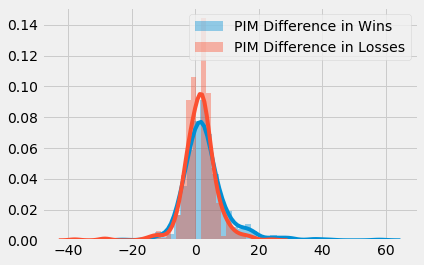

In [30]:
ax = sns.distplot(pim_diff_wins, label='PIM Difference in Wins')
sns.distplot(pim_diff_losses, label='PIM Difference in Losses', ax=ax)

plt.legend()
plt.show()

Notes on the plots

In [31]:
grid_search = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_reg, cv=5)

pim_diff_reshape = pim_diff.reshape((pim_diff.shape[0], 1))

grid_search.fit(pim_diff_reshape, result)

grid_search.score(pim_diff_reshape, result)

0.5282167042889391

In [32]:
-grid_search.best_estimator_.intercept_[0]/grid_search.best_estimator_.coef_[0][0]

-0.9980850748234568

Note on this result.

## Cheater Definition 4

Maybe there's a more complex relationship between Canes' penalty minutes and opponent's penalty minutes which results in a win. Let's first plot some data to see if we're crazy or not, then take a look to see how we can do.

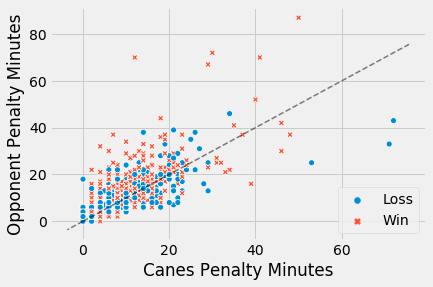

In [37]:
hue=list(map(lambda x: 'Win' if x == 1 else 'Loss', result))

ax = sns.scatterplot(x=games_home_no_ties['pen_min'], y=games_home_no_ties['pen_min_opp'], hue=hue, style=hue)

xs = np.linspace(0, ax.get_xlim())

plt.plot(xs, xs, '--', color='black', alpha=0.5, linewidth=1.5)

plt.xlabel('Canes Penalty Minutes')
plt.ylabel('Opponent Penalty Minutes')

plt.show()

It doesn't seem like this data is super separable, but let's explore it anyway to see how we can do.

In [38]:
log_reg = LogisticRegression(penalty='none')

X = games_home_no_ties[['pen_min', 'pen_min_opp']].to_numpy()
log_reg.fit(X, result)

log_reg.score(X, result)

0.5428893905191874

Hmm not much better than just using the opponent's penalty minutes alone, but let's still do the math on it.

$$ \frac{1}{1 + e^{-(\alpha_{0} x_{0} + \alpha_{1} x_{1} + b)}} \ge \frac{1}{2} $$

$$ 2 \ge 1 + e^{-(\alpha_{0} x_{0} + \alpha_{1} x_{1} + b)} $$

$$ 1 \ge e^{-(\alpha_{0} x_{0} + \alpha_{1} x_{1} + b)} $$

$$ 0 \lt \alpha_{0} x_{0} + \alpha_{1} x_{1} + b $$

If we call $ x_{0} $ (or opponent penalty minutes) $ y $ and call $ x_{1} $ (Canes' penalty minutes) $ x $, then we get:

$$ -\alpha_{y} y \lt \alpha_{x} x + b $$

$$ y \ge -\frac{\alpha_{x}}{\alpha_{y}} x - \frac{b}{\alpha_{y}} $$

Instead of a point, here we get a line, but this can be plotted.

[-0.025184    0.05105374]
-0.2374725808077248
y = 0.4933x - -4.6514


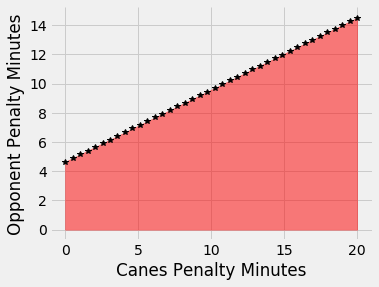

In [39]:
x_range = 20

xs = np.linspace(0, x_range, num=x_range*2)

coefs = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

print (coefs)
print (intercept)

def slope(coefs):
    return -(coefs[0]/coefs[1])

def y_intercept(coefs, intercept):
    return (intercept/coefs[1])

def line(xs, coefs, intercept):
    return slope(coefs) * xs - y_intercept(coefs, intercept)

print ('y = {:.4f}x - {:.4f}'.format(slope(coefs), y_intercept(coefs, intercept)))

ys = line(xs, coefs, intercept)

fig, ax = plt.subplots()
ax.plot(xs, ys, color='black', marker='*', linewidth=0)
ax.set_aspect('equal')
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)

plt.fill_between(xs, ys, color='red', alpha=0.5)

plt.ylabel('Opponent Penalty Minutes')
plt.xlabel('Canes Penalty Minutes')

plt.show()

Any point in the shaded region (extended ad infinitum, of course, were the Canes to be penalized egregiously) is predicted by our model to be a Canes loss. Anything combination above the line, however, is the coveted Canes win! However, since we are again in the 50s in terms of accuracy, we are not doing so hot. 

## Cheater Definition 5
 
Maybe it's true that not every game has a cheater. Perhaps we can define a "cheater" as a team which has more than a certain level penalty minutes than the other team. Let us explore this hypothesis. 

In [40]:
games_home_no_ties['pim_diff_abs'] = abs(games_home_no_ties['pen_min'] - games_home_no_ties['pen_min_opp'])

games_home_no_ties['pim_diff_abs'].max()

58.0

In [41]:
def scale(data, out_range):
    dat = np.array(data)
    domain = [np.min(dat, axis=0), np.max(dat, axis=0)]

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

In [43]:
best_diff = 0
best_acc = 0

xs = []
ys = []
sizes = []

fraction = 0

for pimdiff in range(0, int(games_home_no_ties['pim_diff_abs'].max())+1):
    subset = games_home_no_ties[games_home_no_ties['pim_diff_abs'] >= pimdiff]
    
    if subset.shape[0] < fraction*games_home_no_ties.shape[0]:
        continue
    
    subset['cheaters'] = (subset['pen_min'] > subset['pen_min_opp']).apply(lambda x : 1 if x else 0)
    
    cheaters = subset['cheaters']
    
#     if pimdiff >= 35:
#         print (subset[['pen_min', 'pen_min_opp', 'pim_diff', 'game_outcome', 'cheaters']].head())
    
    curr_result = subset['game_outcome']
    
    curr_acc = sum(cheaters != curr_result) / curr_result.shape[0]
    
    print (pimdiff, curr_acc, curr_result.shape[0])
    xs.append(pimdiff)
    ys.append(curr_acc)
    sizes.append(curr_result.shape[0])

    if curr_acc > best_acc:
        best_acc = curr_acc
        best_diff = pimdiff

sizes = scale(sizes, (5, 50))
ys = [100*y for y in ys]
print (best_diff, best_acc)    

0 0.5282167042889391 886
1 0.5302826379542396 743
2 0.5296495956873315 742
3 0.5560538116591929 446
4 0.5540540540540541 444
5 0.6023622047244095 254
6 0.6007905138339921 253
7 0.6516129032258065 155
8 0.6578947368421053 152
9 0.6851851851851852 108
10 0.6952380952380952 105
11 0.7236842105263158 76
12 0.7397260273972602 73
13 0.7962962962962963 54
14 0.7924528301886793 53
15 0.8095238095238095 42
16 0.8048780487804879 41
17 0.8620689655172413 29
18 0.8461538461538461 26
19 0.9 20
20 0.8888888888888888 18
21 0.8823529411764706 17
22 0.8823529411764706 17
23 0.8823529411764706 17
24 0.9375 16
25 1.0 12
26 1.0 12
27 1.0 11
28 1.0 11
29 1.0 9
30 1.0 7
31 1.0 5
32 1.0 5
33 1.0 5
34 1.0 5
35 1.0 5
36 1.0 5
37 1.0 5
38 1.0 4
39 1.0 2
40 1.0 2
41 1.0 2
42 1.0 2
43 1.0 1
44 1.0 1
45 1.0 1
46 1.0 1
47 1.0 1
48 1.0 1
49 1.0 1
50 1.0 1
51 1.0 1
52 1.0 1
53 1.0 1
54 1.0 1
55 1.0 1
56 1.0 1
57 1.0 1
58 1.0 1
25 1.0


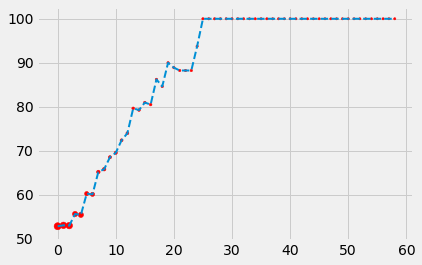

In [44]:
plt.plot(xs, ys, '--', linewidth=2)
plt.scatter(xs, ys, s=sizes, c='r', marker='o')

plt.show()

Maybe our hypothesis that every game has a cheater was correct, but we can only define a cheater as a team which possesses beyond a certain limit of penalty minutes in a game.

In [45]:
games_home_no_ties['pen_min'].max()

72.0

In [46]:
games_home_no_ties['pen_min_opp'].max()

87.0

In [47]:
best_pim = 0
best_score = 0

best_pim_acc = 0
best_acc = 0

pims = []
scores = []
accs = []
size_accs = []

max_pim = games_home_no_ties['pen_min_opp'].max() if games_home_no_ties['pen_min_opp'].max() > games_home_no_ties['pen_min'].max() else games_home_no_ties['pen_min'].max()
max_pim = int(max_pim)
for pim in range(0, max_pim+1):
    games_home_no_ties['canes_cheat'] = games_home_no_ties['pen_min'] >= pim
    games_home_no_ties['canes_cheat'] = games_home_no_ties['canes_cheat'].apply(lambda x: 1 if x else 0)
    
    games_home_no_ties['opp_cheat'] = games_home_no_ties['pen_min_opp'] >= pim
    games_home_no_ties['opp_cheat'] = games_home_no_ties['opp_cheat'].apply(lambda x: 1 if x else 0)
    
    X = games_home_no_ties[['canes_cheat', 'opp_cheat']].to_numpy()
    
    log_reg = LogisticRegression(penalty='none')
    log_reg.fit(X, result)
    
    score = log_reg.score(X, result)
    
    pims.append(pim)
    scores.append(score)
    
    if score > best_score:
        best_pim = pim
        best_score = score
        
    games_home_no_ties['non_cheater'] = games_home_no_ties['canes_cheat'] == games_home_no_ties['opp_cheat']
    games_home_no_ties['cheater'] = games_home_no_ties['canes_cheat'] > games_home_no_ties['opp_cheat']
    
    subset = games_home_no_ties[games_home_no_ties['non_cheater'] == False]
    outcome_subset = np.array(subset['game_outcome'])
    cheater = np.array(subset['cheater'])
    
    if cheater.shape[0] == 0:
        accs.append(0)
        size_accs.append(0)
        continue
    acc = cheater != outcome_subset
    acc = sum(acc) / acc.shape[0]
    
    accs.append(acc)
    size_accs.append(cheater.shape[0])
    if acc > best_acc:
        print ('{:2}, {:.4f}, {:3}'.format(pim, acc, cheater.shape[0]))
        best_acc = acc
        best_pim_acc = pim

print (best_pim, best_score)
print (best_pim_acc, best_acc)

size_accs = scale(size_accs, (5, 50))
print (len(accs), len(pims), len(scores))

 1, 0.2000,  15
 3, 0.3485,  66
 5, 0.4663, 178
 7, 0.5139, 216
 8, 0.5197, 229
 9, 0.5488, 215
10, 0.5603, 232
11, 0.5808, 198
12, 0.5902, 205
13, 0.6556, 180
17, 0.6714, 140
20, 0.7113,  97
25, 0.7115,  52
40, 0.7273,  11
41, 0.7500,  12
47, 0.8889,   9
49, 1.0000,   8
11 0.5553047404063205
49 1.0
88 88 88


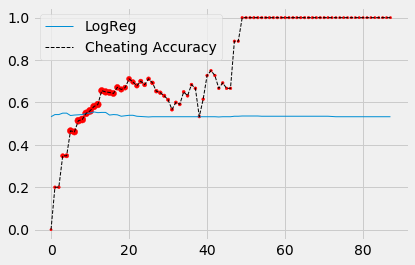

In [48]:
plt.plot(pims, scores, linewidth=1, label='LogReg')
plt.scatter(pims, accs, color='r', marker='o', s=size_accs)
plt.plot(pims, accs, '--', color='black', linewidth=1, label='Cheating Accuracy')

plt.legend()

plt.show()

### Adam's Definitions

Well the way the team seems to define it is anyone who takes a penalty. I suppose I’d define it personally as someone who deliberately breaks the rules to systemically advantage their team in the game.

However I think it’s best to go off team definition since the whole original question (at least for me) basically was “how accurate is this chant?”

I’d be interested to answer that in 3 ways:

1) not really measurable, How often do visiting teams “get away” with penalties (I.e. no-calls) compared to other arenas?

2) what is the hurricanes home PK percentage since adopting the chant (whatever year that is) and how does it measure to the rest of the league in the average game?

3) how many short handed goals have been given up at home by the hurricanes since adopting the chant compared to the rest of the league?

To answer the third query:

In [53]:
games_home['goals_against_sh'].sum()

81.0

In [60]:
years = []
sh_goals = []

for row in games_home.groupby(by='year')['goals_against_sh'].sum().iteritems():
    years.append(row[0])
    sh_goals.append(row[1])

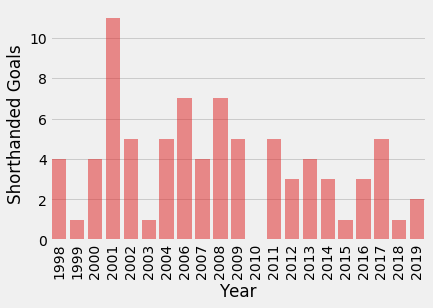

In [104]:
ax = sns.barplot(x=years, y=sh_goals, color='red', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Shorthanded Goals')
plt.xticks(rotation=90)
plt.show()